<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>Networkx version:</b>  >=2.4<br/>
<b>Last update:</b> 16/02/2021
</span>

<a id='top'></a>
# *Chapter 5: Scale Free*

``Networkx`` is a python library designed to provide support to analysis of complex networks.

In this notebook are introduced some of the main features of the library and an overview of its functionalities.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. <br/> A complete documentation (and tutorial) is available on the project [website](https://networkx.github.io/documentation/latest/)


In [2]:
%%capture
!pip install powerlaw

In [3]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline

In [4]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)


    fig = plt.figure(figsize=(16, 6))
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

## Synthetic Networks
``networkx`` allows to generate synthetic network datasets.

## 1.Barabasi-Albert (scale-free) graphs

**Growth:**
While the random network model assumes that the number of nodes is fixed (time invariant), real networks are the result of a growth process that continuously increases.


**Preferential Attachment:**
While nodes in random networks randomly choose their interaction partner, in real networks new nodes prefer to link to the more connected nodes.


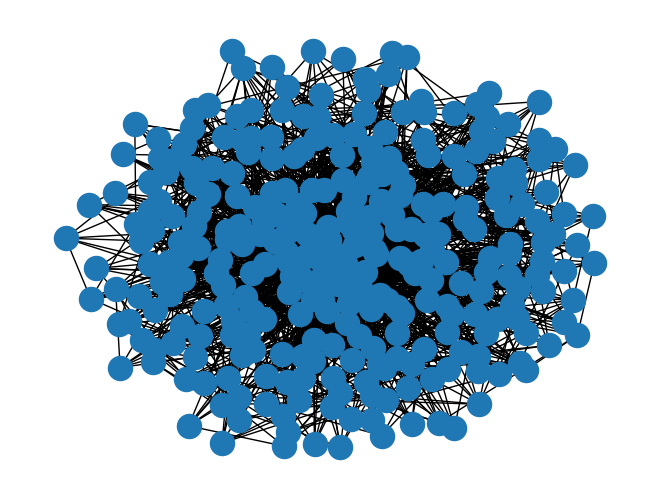

In [6]:
m = 7  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(300, m)
nx.draw(ba)

### Degree distribution with powerlaw fit

In [7]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)


    fig = plt.figure(figsize=(16, 6))
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

Calculating best minimal value for power law fit


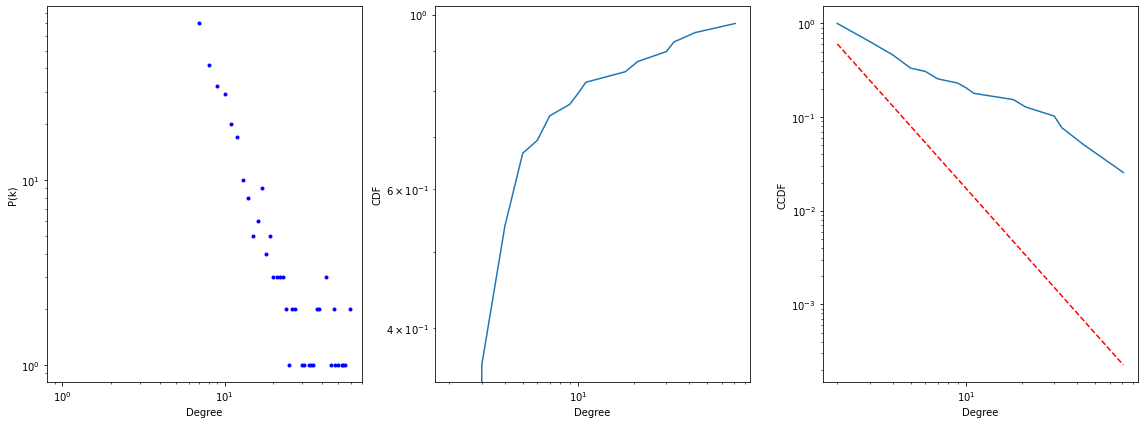

alpha=3.2117020823247 sigma=0.1940276174044339


In [ ]:
plot_dist(ba)

## Extra: Example of Application of Scale Free Analysis



Competitive endogenous RNA (ceRNA) and Power Law on Following paper:

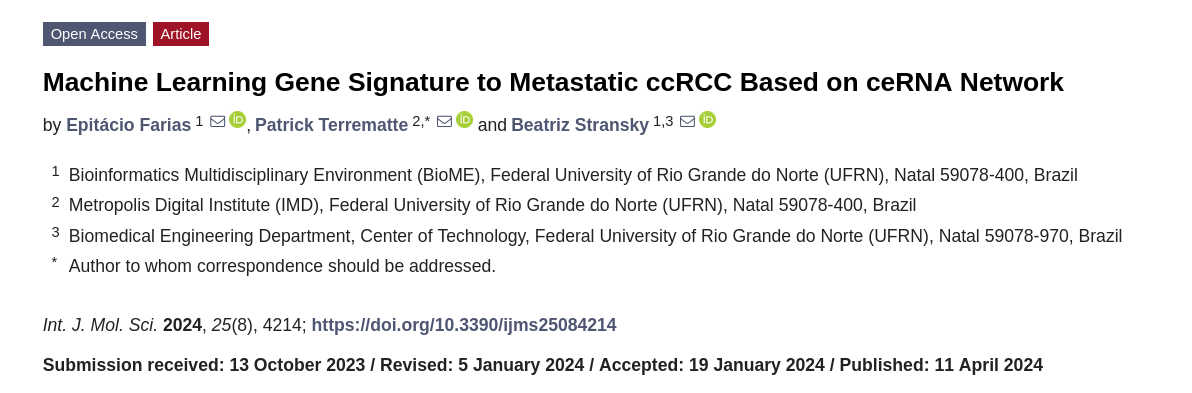

https://www.mdpi.com/1422-0067/25/8/4214

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

## Introduction

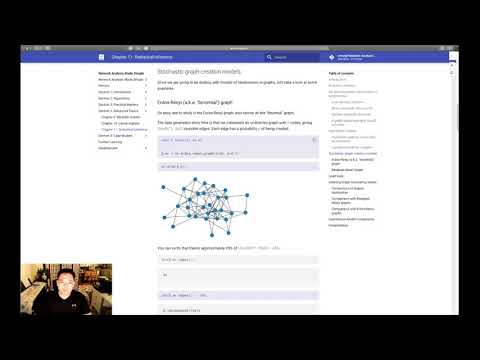

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo(id="P-0CJpO3spg", width="100%")

In this chapter, we are going to take a look at how to perform statistical inference on graphs.

## Statistics refresher

Before we can proceed with statistical inference on graphs,
we must first refresh ourselves with some ideas from the world of statistics.
Otherwise, the methods that we will end up using
may seem a tad _weird_, and hence difficult to follow along.

To review statistical ideas,
let's set up a few statements and explore what they mean.

## We are concerned with models of randomness

As with all things statistics, we are concerned with models of randomness.
Here, probability distributions give us a way to think about random events
and how to assign credibility points to them.

### In an abstract fashion...

The supremely abstract way of thinking about a probability distribution
is that it is the space of all possibilities of "stuff"
with different credibility points _distributed_ amongst each possible "thing".

### More concretely: the coin flip

A more concrete example is to consider the coin flip.
Here, the space of all possibilities of "stuff" is the set of "heads" and "tails".
If we have a fair coin, then we have 0.5 credibility points _distributed_
to each of "heads" and "tails".

### Another example: dice rolls

Another concrete example is to consider the six-sided dice.
Here, the space of all possibilities of "stuff" is the set of numbers in the range $[1, 6]$.
If we have a fair dice, then we have 1/6 credibility points assigned
to each of the numbers.
(Unfair dice will have an unequal _distribution_ of credibility points across each face.)

### A graph-based example: social networks

If we receive an undirected social network graph with 5 nodes and 6 edges,
we have to keep in mind that this graph with 6 edges
was merely one of $15 \choose 6$ ways to construct 5 node, 6 edge graphs.
(15 comes up because there are 15 edges that can be constructed in a 5-node undirected graph.)

## Hypothesis Testing

A commonplace task in statistical inferences
is calculating the probability of observing a value or something more extreme
under an assumed "null" model of reality.
This is what we commonly call "hypothesis testing",
and where the oft-misunderstood term "p-value" shows up.

### Hypothesis testing in coin flips, by simulation

As an example, hypothesis testing in coin flips follows this logic:

- I observe that 8 out of 10 coin tosses give me heads, giving me a probability of heads $p=0.8$ (a summary statistic).
- Under a "null distribution" of a fair coin, I simulate the distribution of probability of heads (the summary statistic) that I would get from 10 coin tosses.
- Finally, I use that distribution to calculate the probability of observing $p=0.8$ or more extreme.

### Hypothesis testing in graphs

The same protocol applies when we perform hypothesis testing on graphs.

Firstly, we calculate a _summary statistic_ that describes our graph.

Secondly, we propose a _null graph model_, and calculate our summary statistic under simulated versions of that null graph model.

Thirdly, we look at the probability of observing the summary statistic value that we calculated in step 1 or more extreme, under the assumed graph null model distribution.

In [ ]:
!wget 'https://raw.githubusercontent.com/terrematte/network_analysis/refs/heads/main/data/ceRNA_edges.graphml'

In [ ]:
import networkx as nx
import numpy as np
G_ceRNA = nx.read_graphml("ceRNA_edges.graphml")


In [ ]:
len(G_ceRNA.edges())

487

In [ ]:
len(G_ceRNA.nodes())

221

In [ ]:
(221**2 - 221) / 2

24310.0

In [ ]:
len(G_ceRNA.edges()) / 24310

0.020032908268202386

In [ ]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

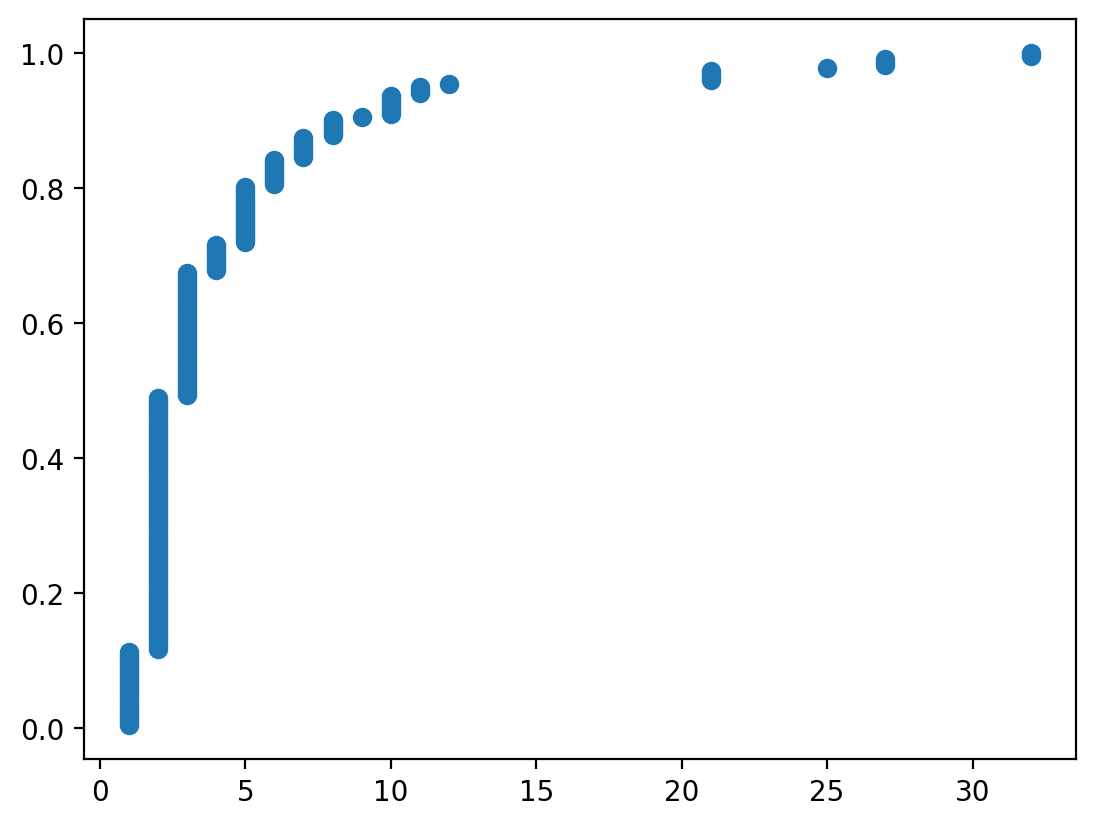

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

x, y = ecdf(pd.Series(dict(nx.degree(G_ceRNA))))
plt.scatter(x, y)

Here we create a Erdos-Renyi Graph with the same number of nodes of our ceRNA, and the same probability $p$ to create each edge.

In [ ]:
import networkx as nx
import numpy as np

G_er = nx.erdos_renyi_graph(n=221, p=0.02)

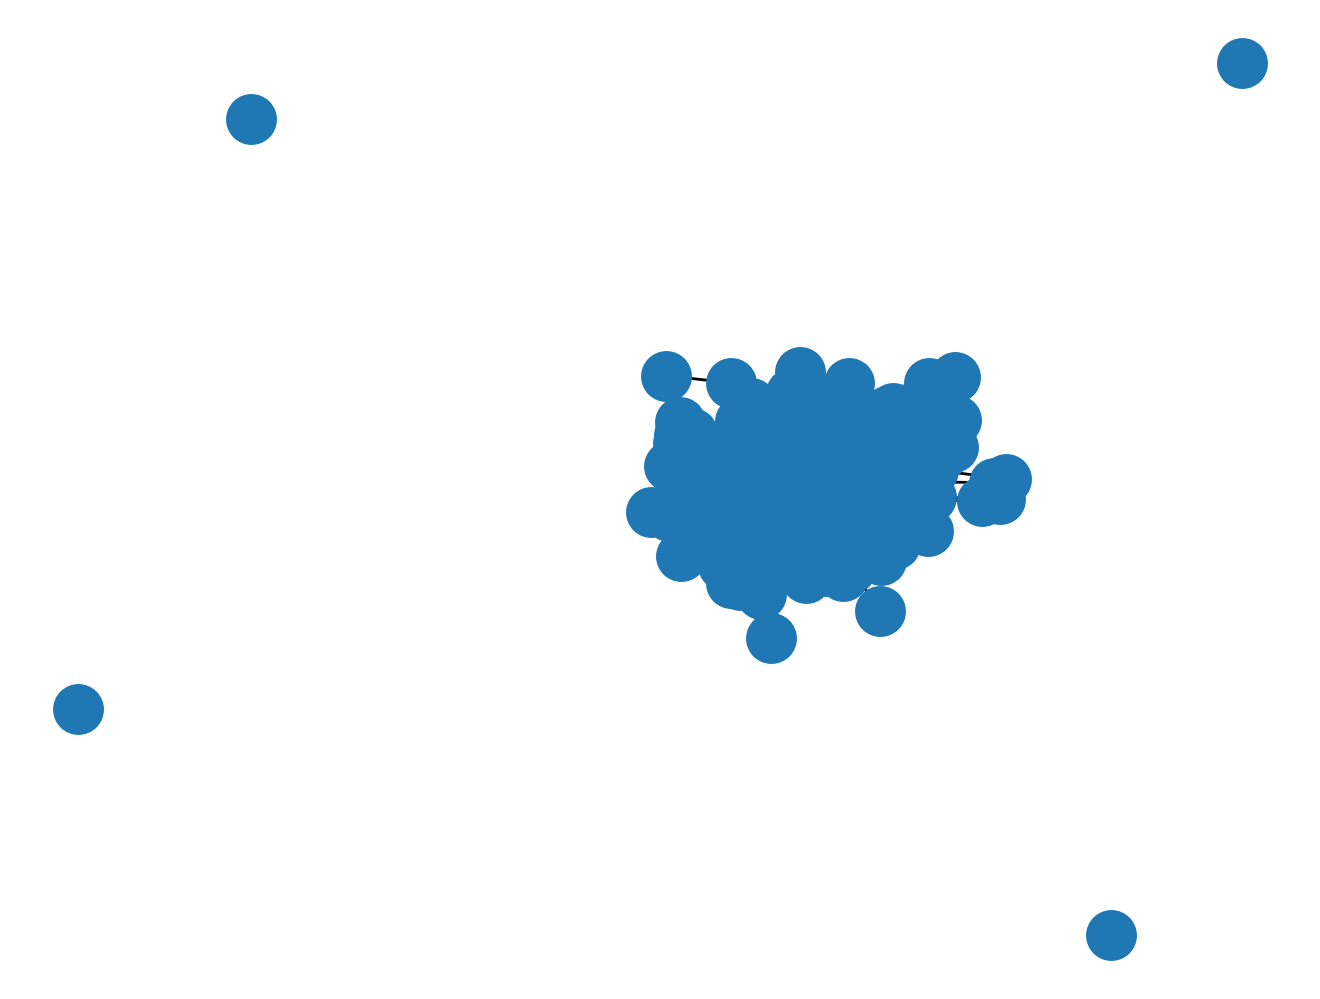

In [ ]:
nx.draw(G_er)

In [ ]:
len(G_er.edges())

467

In [ ]:
len(G_er.edges()) / 221

2.1131221719457014

In [ ]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

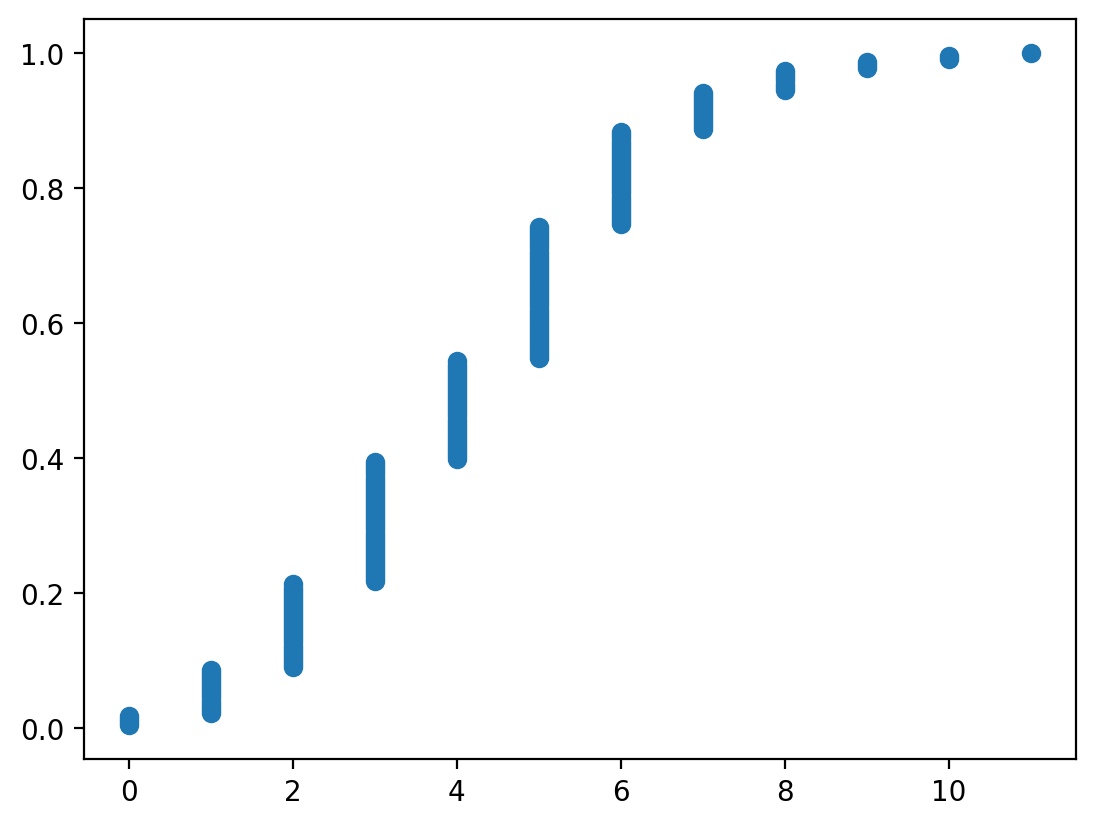

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

x, y = ecdf(pd.Series(dict(nx.degree(G_er))))
plt.scatter(x, y)

interactive(children=(IntSlider(value=2, description='m', max=10, min=1), Output()), _dom_classes=('widget-int…

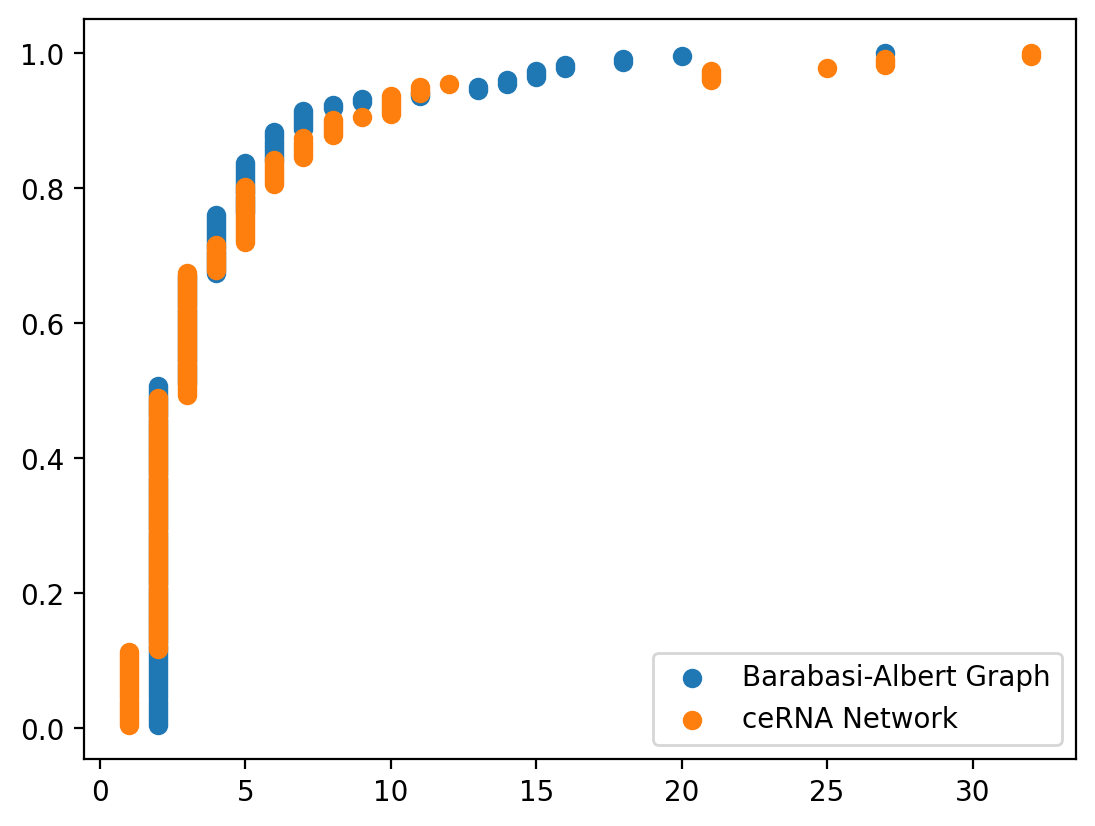

In [ ]:
from ipywidgets import interact, IntSlider

m = IntSlider(value=2, min=1, max=10)

@interact(m=m)
def compare_barabasi_albert_graph(m):
    fig, ax = plt.subplots()
    G_ba = nx.barabasi_albert_graph(n=len(G_ceRNA.nodes()), m=m)
    x, y = ecdf(pd.Series(dict(nx.degree(G_ba))))
    ax.scatter(x, y, label="Barabasi-Albert Graph")

    x, y = ecdf(pd.Series(dict(nx.degree(G_ceRNA))))
    ax.scatter(x, y, label="ceRNA Network")
    ax.legend()

interactive(children=(FloatSlider(value=0.1, description='p', max=0.1, step=0.001), Output()), _dom_classes=('…

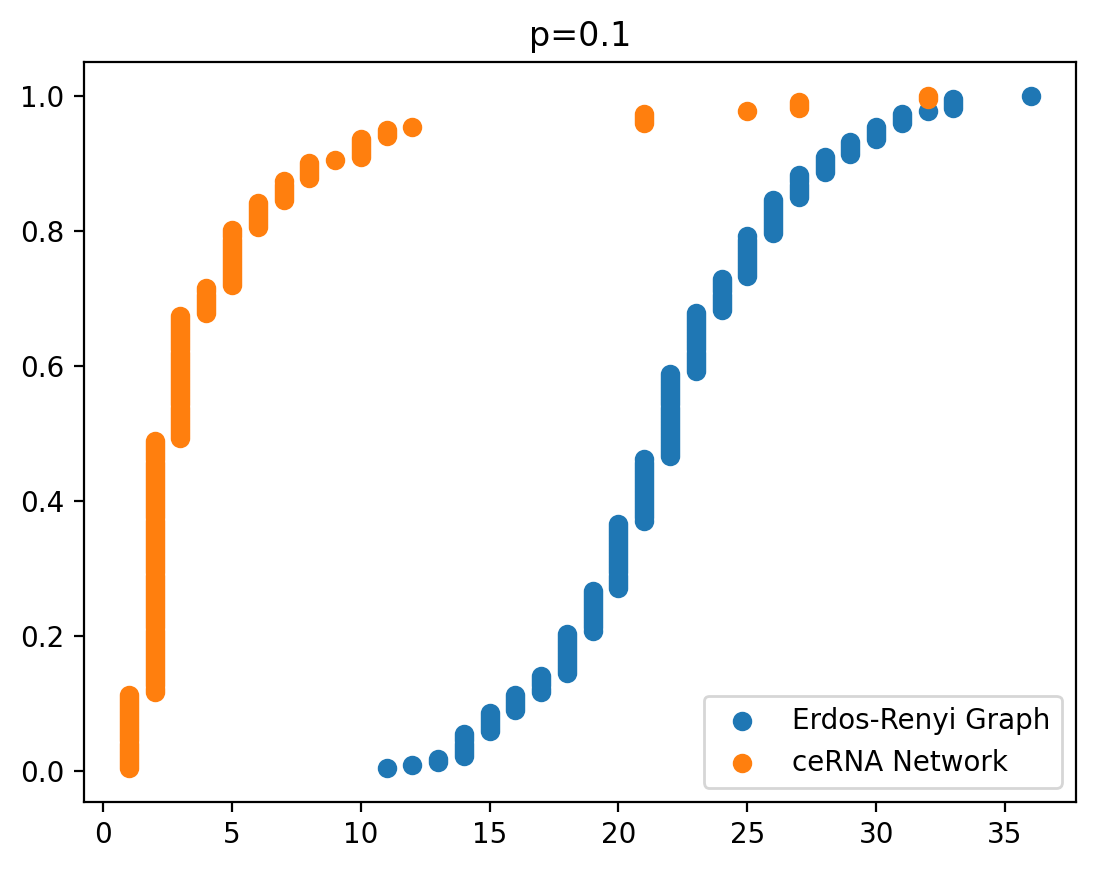

In [ ]:
from ipywidgets import FloatSlider
p = FloatSlider(value=0.6, min=0, max=0.1, step=0.001)

@interact(p=p)
def compare_erdos_renyi_graph(p):
    fig, ax = plt.subplots()
    G_er = nx.erdos_renyi_graph(n=len(G_ceRNA.nodes()), p=p)
    x, y = ecdf(pd.Series(dict(nx.degree(G_er))))
    ax.scatter(x, y, label="Erdos-Renyi Graph")

    x, y = ecdf(pd.Series(dict(nx.degree(G_ceRNA))))
    ax.scatter(x, y, label="ceRNA Network")
    ax.legend()
    ax.set_title(f"p={p}")

In [ ]:
G_ceRNA = G_ceRNA.to_undirected()

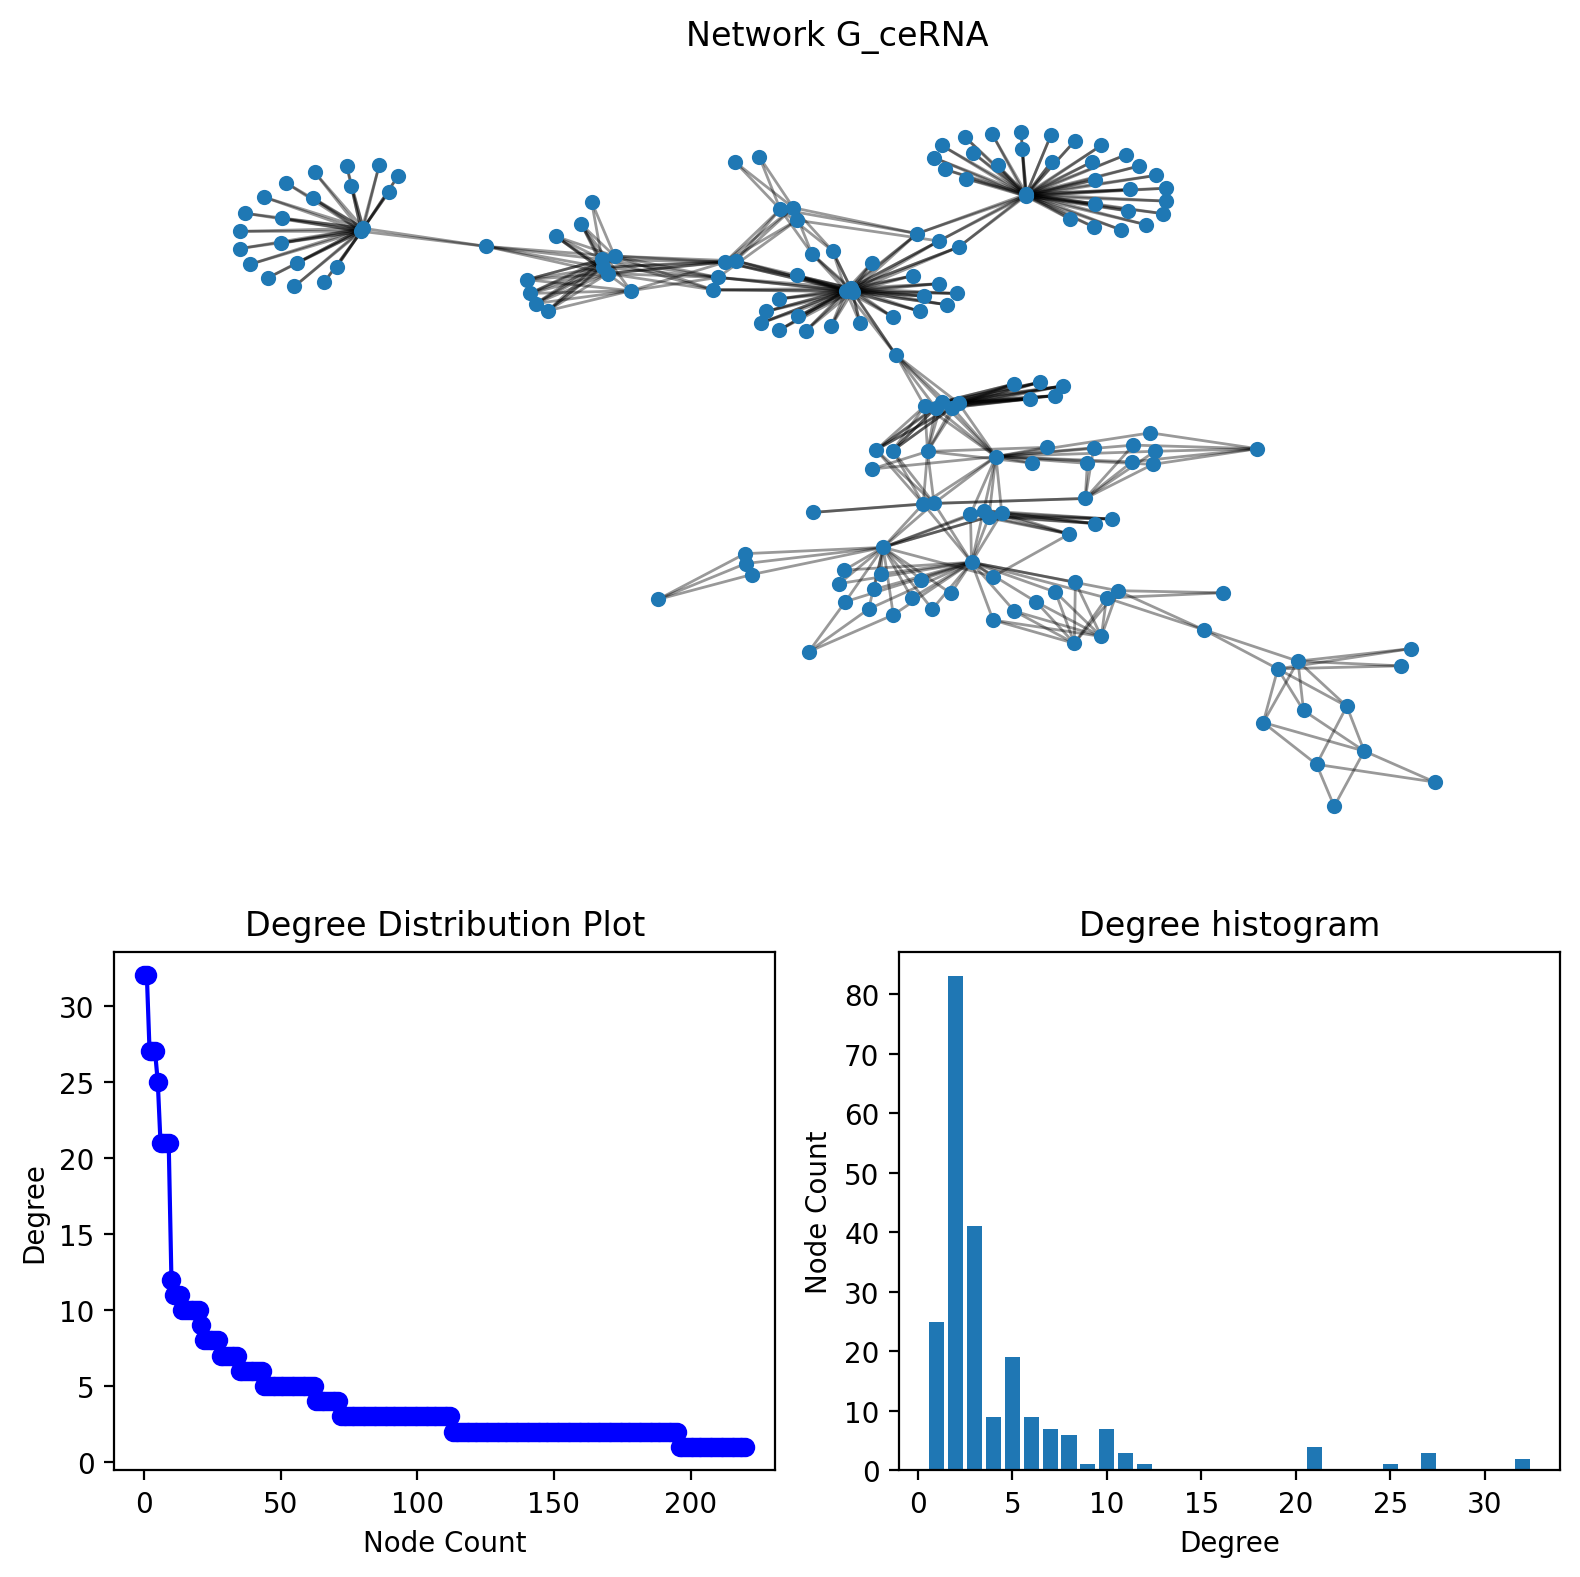

In [ ]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt

#G = nx.barabasi_albert_graph(n = 20, m = 2, seed=10374196, initial_graph = None)

degree_sequence = sorted((d for n, d in G_ceRNA.degree()), reverse=True)

dmax = max(degree_sequence)
fig = plt.figure("Degree of a random graph", figsize=(8, 8))

# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])

Gcc = G_ceRNA.to_undirected().subgraph(sorted(nx.connected_components(G_ceRNA.to_undirected()), key=len, reverse=True)[0])
#pos = nx.spring_layout(Gcc, seed=10396953)
pos = nx.kamada_kawai_layout(Gcc)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)

ax0.set_title("Network G_ceRNA")
ax0.set_axis_off()
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
#ax1.yscale('log',base='e')
#ax1.xscale('log',base='e')
ax1.set_title("Degree Distribution Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Node Count")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Node Count")
fig.tight_layout()
plt.show()

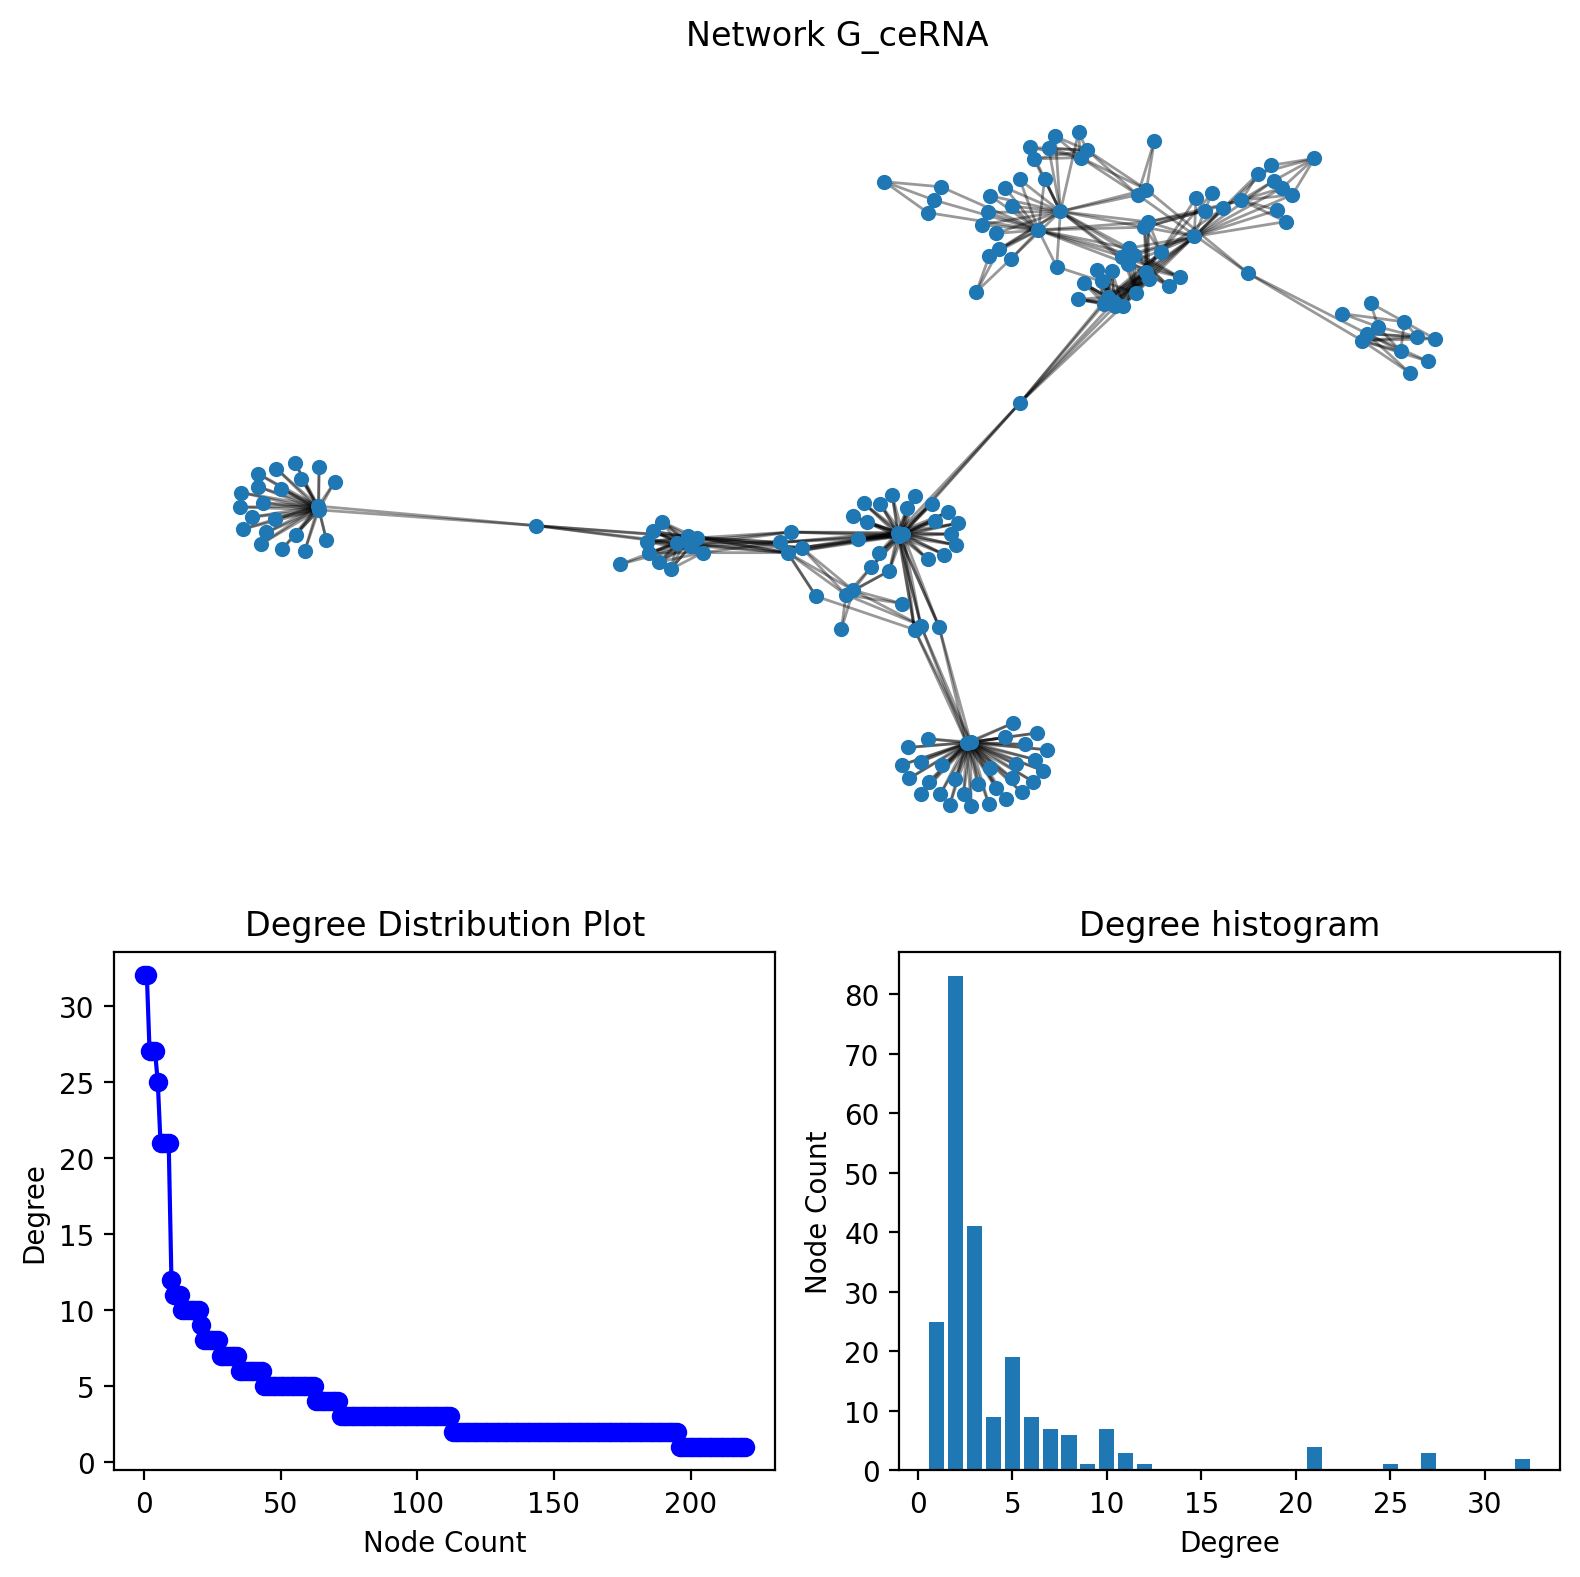

In [ ]:
# Create a gridspec for adding subplots of different sizes
fig = plt.figure("Degree of a random graph", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])

Gcc = G_ceRNA.to_undirected().subgraph(sorted(nx.connected_components(G_ceRNA.to_undirected()), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)

ax0.set_title("Network G_ceRNA")
ax0.set_axis_off()
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Distribution Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Node Count")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Node Count")
fig.tight_layout()
plt.show()

In [9]:
%%capture
!pip install powerlaw

In [ ]:
degree_sequence = sorted([d for n, d in G_ceRNA.degree()], reverse=True) # used for degree distribution and powerlaw test

In [ ]:
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence)

Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Text(0, 0.5, 'Node Count (log scale)')

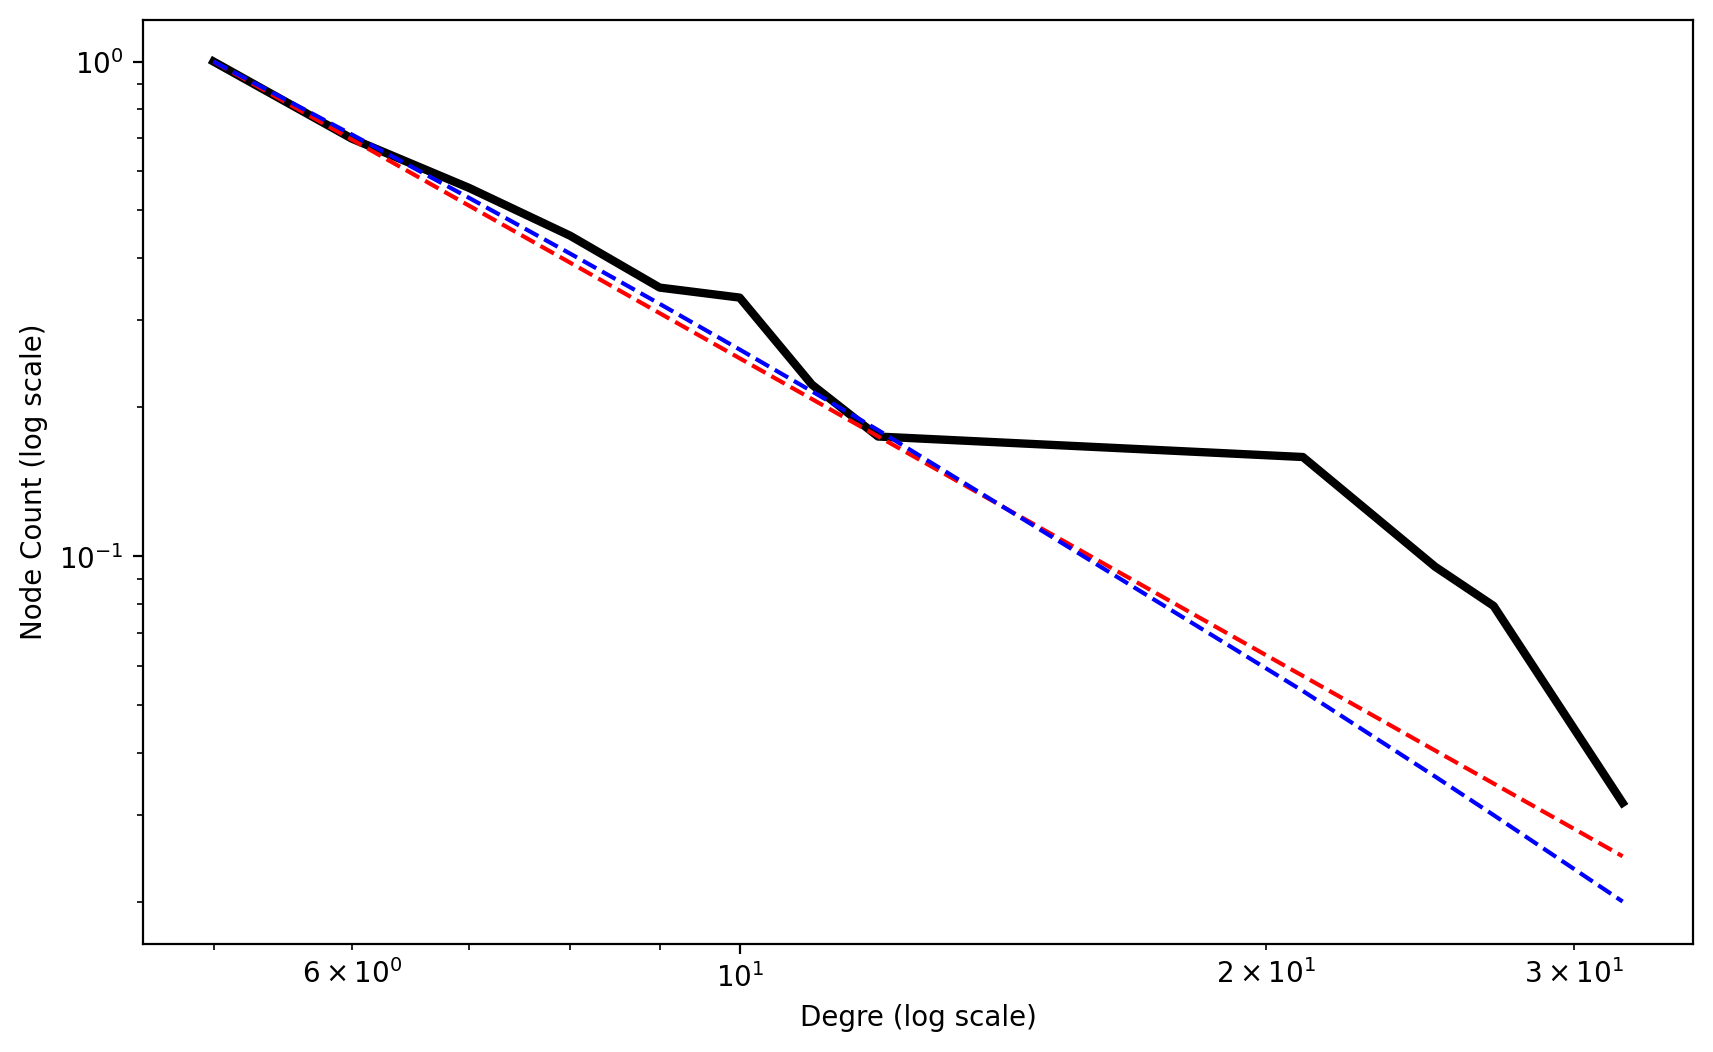

In [ ]:
plt.figure(figsize=(10, 6))
fit.distribution_compare('power_law', 'lognormal')
fig1 = fit.plot_ccdf(linewidth=3, color='black')
fit.power_law.plot_ccdf(ax=fig1, color='r', linestyle='--') #powerlaw
fit.lognormal.plot_ccdf(ax=fig1, color='g', linestyle='--') #lognormal
fit.stretched_exponential.plot_ccdf(ax=fig1, color='b', linestyle='--') #stretched_exponential
ax = fig.add_subplot(111)
fig1.set_xlabel('Degre (log scale)')
fig1.set_ylabel('Node Count (log scale)')

Calculating best minimal value for power law fit


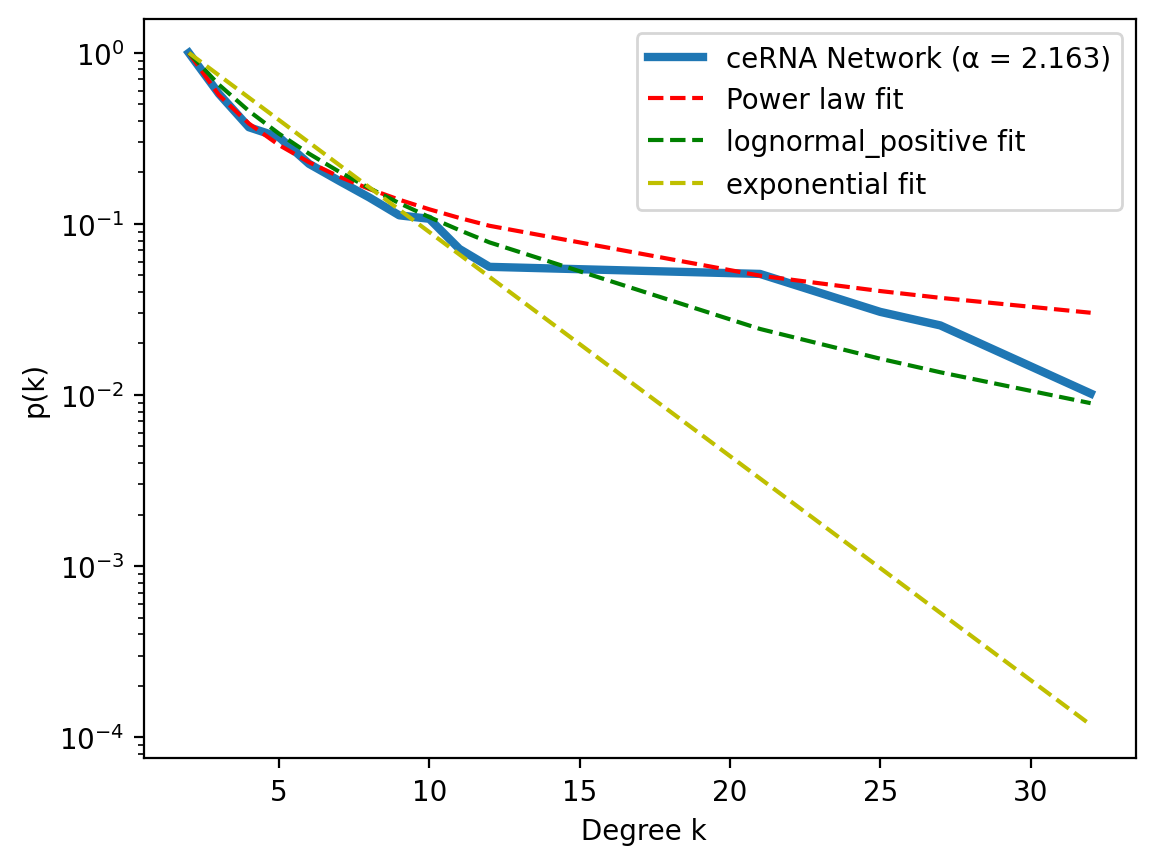

In [ ]:
degree_sequence = sorted([d for n, d in G_ceRNA.degree()], reverse=True) # used for degree distribution and powerlaw test
fit = powerlaw.Fit(degree_sequence, discrete=True)
#fit = powerlaw.Fit(data, discrete=True)
####
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='ceRNA Network (α = '+ str(round(fit.alpha, 3)) +')')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal_positive.plot_ccdf(ax=fig, color='g', linestyle='--', label='lognormal_positive fit')
fit.exponential.plot_ccdf(ax=fig, color='y', linestyle='--', label='exponential fit')
####

fig.set_ylabel(u"p(k)")
fig.set_xlabel(" Degree k")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=1)

#fig.set_yscale('linear')
fig.set_xscale('linear')
figname = 'FigLognormal'
#savefig(figname+'.eps', bbox_inches='tight')

In [ ]:
fit.alpha, fit.power_law.xmin

(2.1625641686296087, 2.0)

In [ ]:
from scipy.stats import kstest
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin
test, p = kstest(degree_sequence, "powerlaw", args = (alpha, xmin),N=len(degree_sequence))


print("Test: " + str(test) + "\nP-value: " + str(p))

Test: 0.5113122171945701
P-value: 3.958740214032303e-54


# Power law Fitting and Testing

_"Now we have the list of degrees, we can use the powerlaw package to extract the parameters of the power law distribution fit to the data and then test whether a power law distribution or another distribution better fits the data. If the likelihood (first value) is positive, then the first distribution is more likely. If it is negative, the second distribution fits the data better The p-value (second value) tests whether the sign of the likelihood is significant. Which distribution do you think has the best fit?"_

References:

https://ramellose.github.io/networktutorials/python_networks.html


https://stats.stackexchange.com/questions/118334/power-law-fitting-and-testing



_We use the Python toolbox powerlaw that implements a method proposed by Aaron Clauset and collaborators in this paper. The paper explains why fitting a power law distribution using a linear regression of logarthim is not correct. A more sound approach is based on a Maximum Likelihood Estimator._


_"In practice, we can rarely, if ever, be certain that an observed quantity is drawn from a power-law distribution. The most we can say is that our observations are consistent with the hypothesis that is drawn from a distribution of the form of $p(x) = α x ^{-α}$. In some cases we may also be able to rule out some other competing hypotheses"_

https://lordgrilo.github.io/complexity-book/2-networkx/nb04_powerlaw_fitting.html#the-powerlaw-package

$R$ is the loglikelihood ratio between the two candidate distributions. This number will be positive if the data is more likely in the first distribution, and negative if the data is more likely in the second distribution. The significance value for that direction is $p$.

_"(...) each of your LRT comparisons produces a pair (r,p), where r is the normalized log likelihood ratio and p is the statistical significance of that ratio. The thing that is being tested for the p-value here is whether the sign of r is meaningful. If $p<0.05$ for a LRT, then a positive sign indicates the power-law model is favored."_

https://stackoverflow.com/questions/49266070/comparing-power-law-with-other-distributions

In [ ]:
R,p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
R,p

(2.6460227711015727, 0.008144433376597713)

In [ ]:
R1,p1 = fit.distribution_compare('power_law', 'lognormal_positive', normalized_ratio=True)
R1,p1

(-0.5985904850840599, 0.5494460026140211)

In [ ]:
R2,p2 = fit.distribution_compare('power_law', 'lognormal_positive', normalized_ratio=True)
R2,p2

(-0.5985904850840599, 0.5494460026140211)

In [ ]:
R3,p3 = fit.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
R3,p3

Assuming nested distributions


(-2.629746215000812, 0.012270483614669425)

In [ ]:
R4,p4 = fit.distribution_compare('power_law', 'stretched_exponential', normalized_ratio=True)
R4,p4

(-1.951824031609533, 0.05095910009045484)

In [ ]:
fit.power_law.D

0.04142336918396761

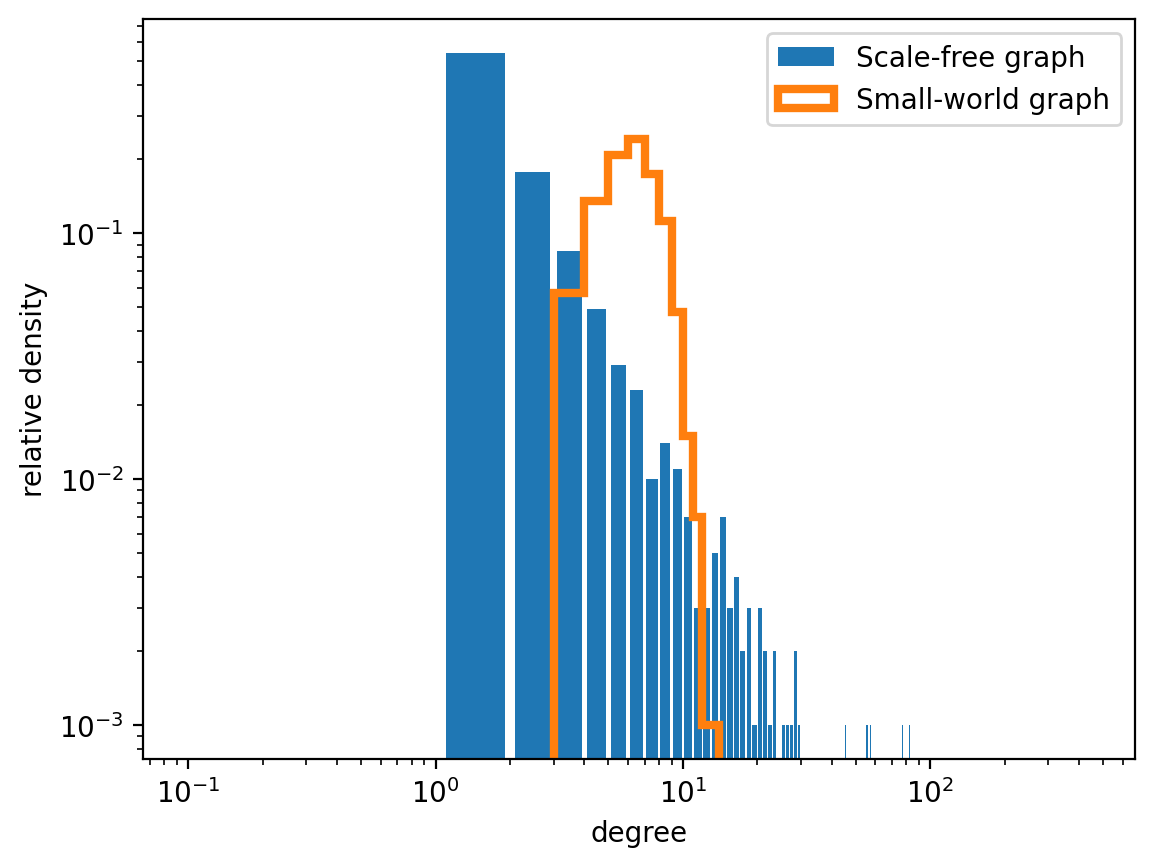

In [ ]:
#https://stackoverflow.com/questions/49498344/using-python-and-networkx-to-find-the-probability-density-function
g1 = nx.scale_free_graph(1000, ) #scale-free graph
g2 = nx.watts_strogatz_graph(1000, 6, p=0.8) #small world graph

# we don't need to sort the values since the histogram will handle it for us
deg_g1 = [g1.degree(n) for n in g1.nodes()]
deg_g2 = [g2.degree(n) for n in g2.nodes()]
# there are smarter ways to choose bin locations, but since
# degrees must be discrete, we can be lazy...
max_degree = max(deg_g1 + deg_g2)

# plot different styles to see both
fig = plt.figure()
ax = fig.add_subplot(111)
arr1 = ax.hist(deg_g1, bins=range(0, max_degree), density=True, histtype='bar', rwidth=0.8, label='Scale-free graph')
arr2 = ax.hist(deg_g2, bins=range(0, max_degree), density=True, histtype='step', lw=3, label='Small-world graph')

# setup the axes to be log/log scaled
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('degree')
ax.set_ylabel('relative density')
ax.legend()

plt.show()

In [ ]:
degree_sequence = sorted([d for n, d in G_ceRNA.degree()], reverse=True) # used for degree distribution and powerlaw test

In [ ]:
deg = dict(nx.degree(G_ceRNA))
deg = list(deg.values())

import powerlaw
plt.figure(figsize=(10, 6))
fit = powerlaw.Fit(deg, discrete=True)
fit.distribution_compare('power_law', 'lognormal')
fit.distribution_compare('power_law', 'exponential')
fit.distribution_compare('power_law', 'lognormal_positive')
fit.distribution_compare('power_law', 'stretched_exponential')

Calculating best minimal value for power law fit


(-2.7247327401523957, 0.05095910009045484)

<Figure size 1000x600 with 0 Axes>

<Axes: >

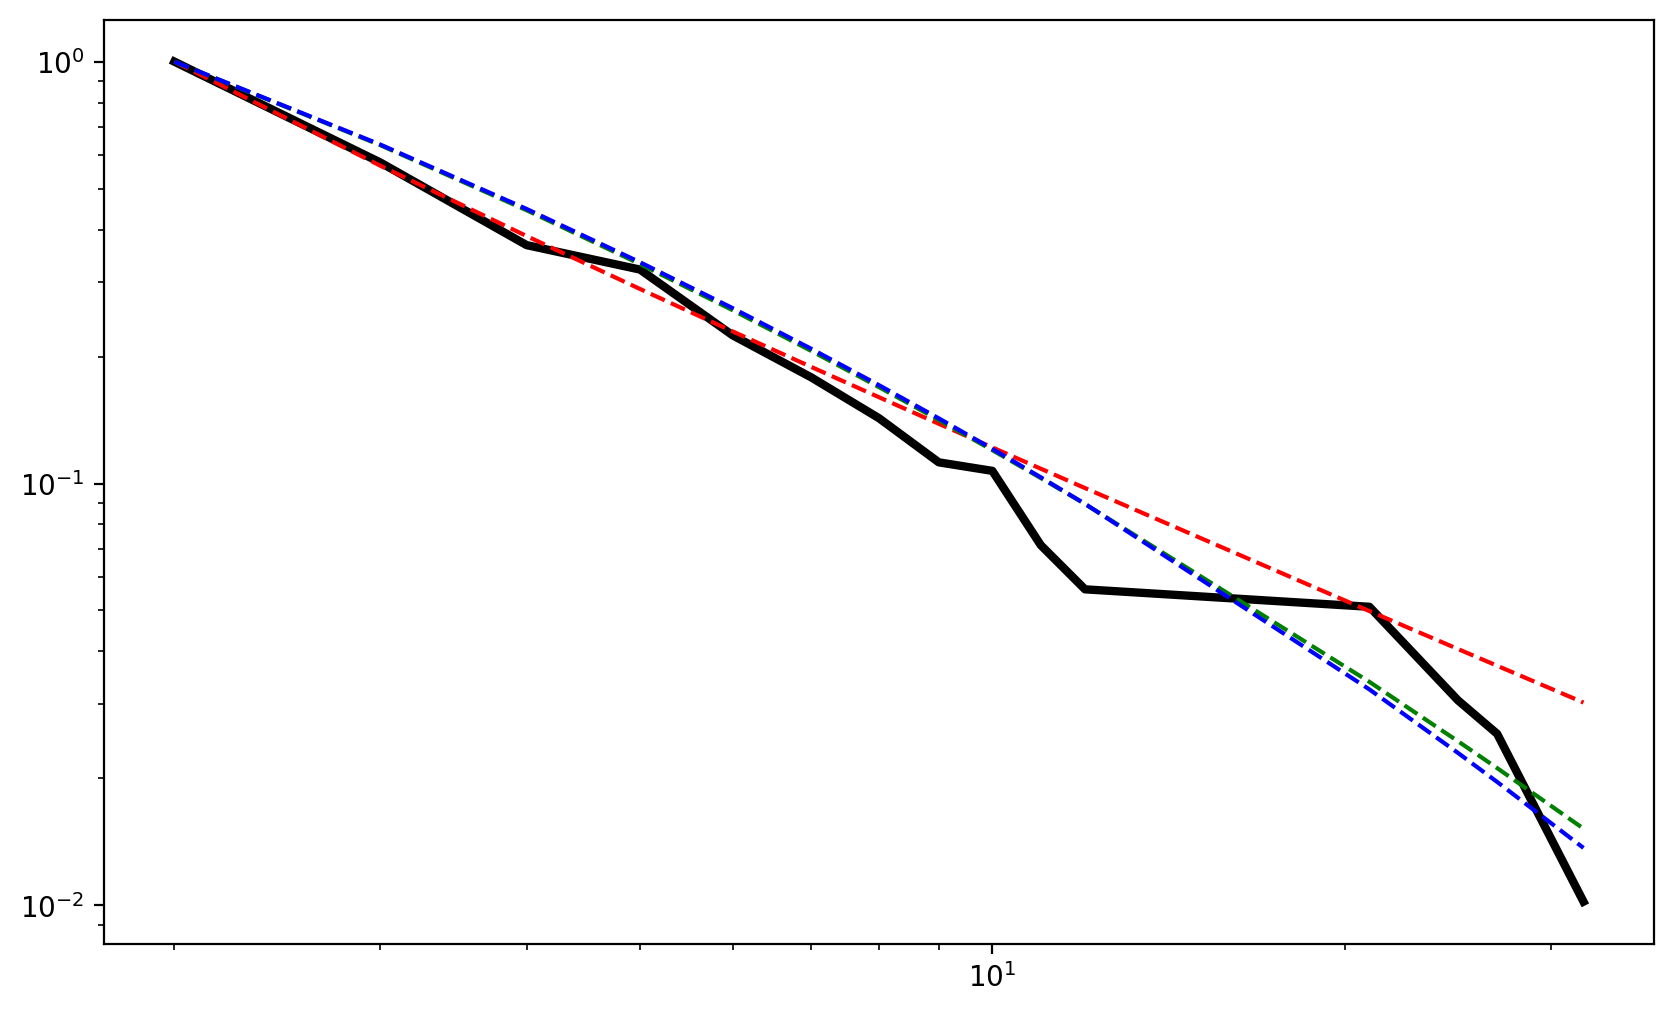

In [ ]:
plt.figure(figsize=(10, 6))
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_ccdf(linewidth=3, color='black')
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--') #stretched_exponential


Calculating best minimal value for power law fit


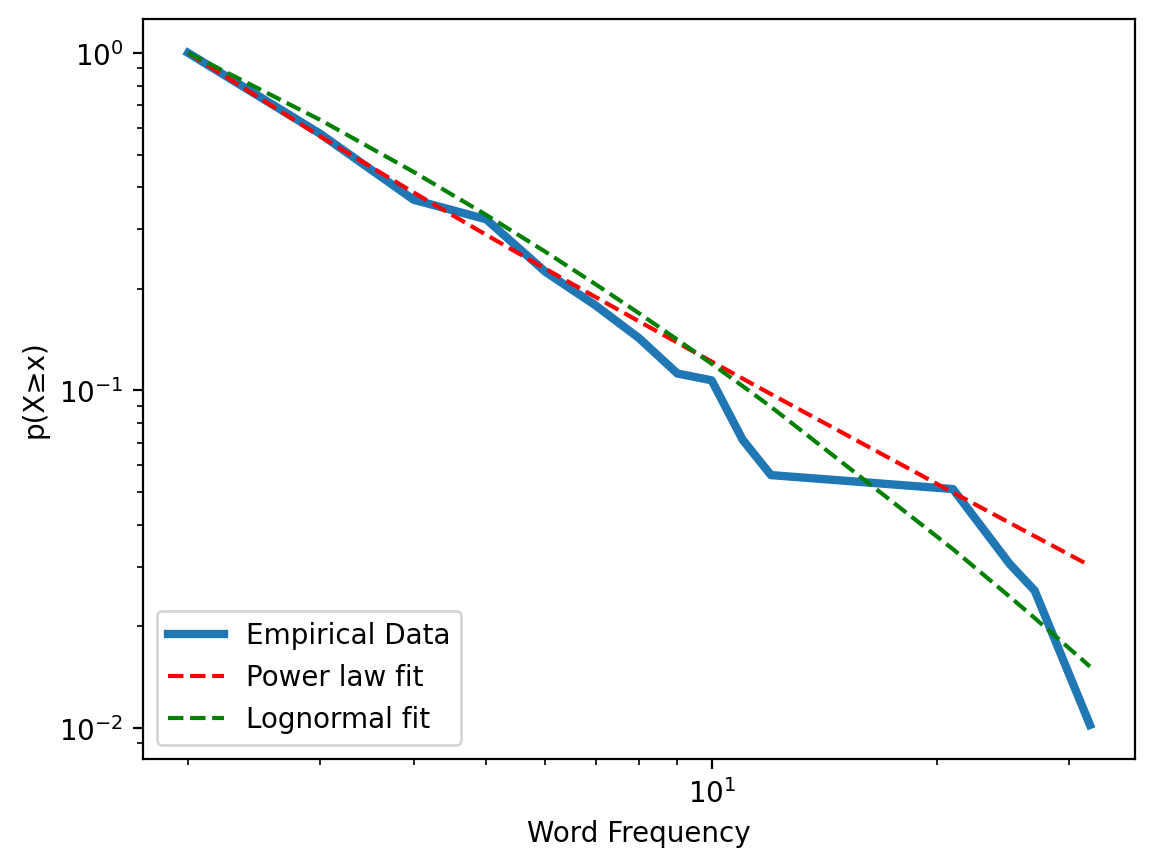

In [ ]:

degree_sequence = sorted([d for n, d in G_ceRNA.degree()], reverse=True) # used for degree distribution and powerlaw test
fit = powerlaw.Fit(degree_sequence, discrete=True)
####
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Word Frequency")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

figname = 'FigLognormal'
#savefig(figname+'.eps', bbox_inches='tight')
#savefig(figname+'.tiff', bbox_inches='tight', dpi=300)



### Erdos-Renyi (a.k.a. "binomial") graph

On easy one to study is the Erdos-Renyi graph, also known as the "binomial" graph.

The data generation story here is that we instantiate an undirected graph with $n$ nodes,
giving $\frac{n^2 - n}{2}$ possible edges.
Each edge has a probability $p$ of being created.

## Interpretation

That statement, accurate as it might be, still does not connect the dots to _biology_.

Let's think about the generative model for this graph.
The Barabasi-Albert graph gives us a model for "rich gets richer".
Given the current state of the graph,
if we want to add a new edge, we first pick a node with probability proportional to
the number of edges it already has.
Then, we pick another node with probability proportional to the number of edges that it has too.
Finally, we add an edge there.
This has the effect of "enriching" nodes that have a large number of edges with more edges.

How might this connect to biology?

We can't necessarily provide a concrete answer, but this model might help raise new hypotheses.

For example, if protein-protein interactions of the "binding" kind
are driven by subdomains, then proteins that acquire a domain through recombination
may end up being able to bind to everything else that the domain was able to.
In this fashion, proteins with that particular binding domain
gain new edges more readily.

Testing these hypotheses would be a totally different matter, and at this point,
I submit the above hypothesis with a large amount of salt thrown over my shoulder.
In other words, the hypothesized mechanism could be completely wrong.
However, I hope that this example illustrated that
the usage of a "graph generative model" can help us narrow down hypotheses about the observed world.

# Others Analysis



## Stochastic graph creation models

Since we are going to be dealing with models of randomness in graphs,
let's take a look at some examples.

In [ ]:
G_ceRNA

### Erdos-Renyi (a.k.a. "binomial") graph

On easy one to study is the Erdos-Renyi graph, also known as the "binomial" graph.

The data generation story here is that we instantiate an undirected graph with $n$ nodes,
giving $\frac{n^2 - n}{2}$ possible edges.
Each edge has a probability $p$ of being created.

### Comparison with Barabasi-Albert graphs

### Comparison with Erdos-Renyi graphs

## Quantitative Model Comparison

Each time we plug in a value of $m$ for the Barabasi-Albert graph model, we are using one of many possible Barabasi-Albert graph models, each with a different $m$.
Similarly, each time we choose a different $p$ for the Erdos-Renyi model, we are using one of many possible Erdos-Renyi graph models, each with a different $p$.

To quantitatively compare degree distributions, we can use the [Wasserstein distance][wasd] between the data.
Let's see how to implement this.

[wasd]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html

In [ ]:
from scipy.stats import wasserstein_distance

def erdos_renyi_degdist(n, p):
    """Return a Pandas series of degree distribution of an Erdos-Renyi graph."""
    G = nx.erdos_renyi_graph(n=n, p=p)
    return pd.Series(dict(nx.degree(G)))

def barabasi_albert_degdist(n, m):
    """Return a Pandas series of degree distribution of an Barabasi-Albert graph."""
    G = nx.barabasi_albert_graph(n=n, m=m)
    return pd.Series(dict(nx.degree(G)))

In [ ]:
deg = pd.Series(dict(nx.degree(G_ceRNA)))

er_deg = erdos_renyi_degdist(n=len(G_ceRNA.nodes()), p=0.001)
ba_deg = barabasi_albert_degdist(n=len(G_ceRNA.nodes()), m=1)
wasserstein_distance(deg, er_deg), wasserstein_distance(deg, ba_deg)

(4.1719457013574655, 2.6153846153846145)

Notice that because the graphs are instantiated in a non-deterministic fashion, re-running the cell above will give you different values for each new graph generated.

Let's now plot the wasserstein distance to our graph data for the two particular Erdos-Renyi and Barabasi-Albert graph models shown above.

In [ ]:
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

er_dist = []
ba_dist = []
for _ in tqdm(range(100)):
    er_deg = erdos_renyi_degdist(n=len(G_ceRNA.nodes()), p=0.001)
    er_dist.append(wasserstein_distance(deg, er_deg))


    ba_deg = barabasi_albert_degdist(n=len(G_ceRNA.nodes()), m=1)
    ba_dist.append(wasserstein_distance(deg, ba_deg))

er_degs = [erdos_renyi_degdist(n=len(G_ceRNA.nodes()), p=0.001) for _ in range(100)]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
%%capture
!pip install janitor

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 23.1 MB/s eta 0:00:00
  Created wheel for janitor: filename=Janitor-0.1.1-py3-none-any.whl size=3810 sha256=9a77bd5a028d924574b74005ea5c8e4ef5c389605638f1ef02f05843b762eba5
  Stored in directory: /root/.cache/pip/wheels/46/09/c4/04f1ce068cf653251d33e020080654539d3459cc52b07ce6fc
Successfully built janitor


In [ ]:
import seaborn as sns
import janitor


data = (
    pd.DataFrame(
        {
            "Erdos-Renyi": er_dist,
            "Barabasi-Albert": ba_dist,
        }
    )
    .melt(value_vars=["Erdos-Renyi", "Barabasi-Albert"])
    #.rename({"variable": "Graph Model", "value": "Wasserstein Distance"})
)
#sns.swarmplot(data=data, x="Graph Model", y="Wasserstein Distance")
sns.swarmplot(data=data, x="variable", y="value")